# Домашняя работа №5


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

flowers = load_iris()
df = pd.DataFrame(flowers.data,columns=flowers.feature_names)
df.drop(["petal length (cm)","petal width (cm)"],axis=1,inplace=True)

In [97]:
# обучаем модель
variety = flowers.target
X_train,X_test,y_train,y_test = train_test_split(df,variety,test_size=0.25)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
lda.predict(X_test)

# оценим точность модели
result=pd.DataFrame([y_test,lda.predict(X_test)]).T
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lda.predict(X_test))

0.7631578947368421

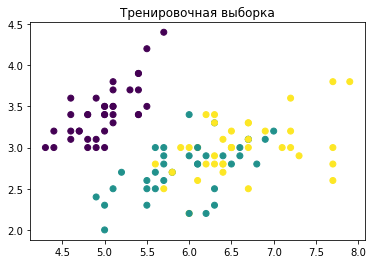

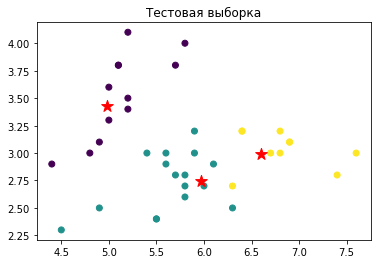

In [81]:
plt.scatter(x=X_train["sepal length (cm)"],y=X_train["sepal width (cm)"],c=y_train)
plt.title("Тренировочная выборка")
plt.show()

y_test = lda.predict(X_test)
plt.scatter(x=X_test["sepal length (cm)"],y=X_test["sepal width (cm)"],c=y_test)
plt.scatter(lda.means_[:,0],lda.means_[:,1], c='r', s=150, marker='*')
plt.title("Тестовая выборка")
plt.show()

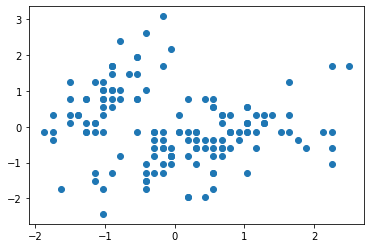

In [62]:
# нормализация данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
plt.scatter(x=df_scaled[:,0],y=df_scaled[:,1])

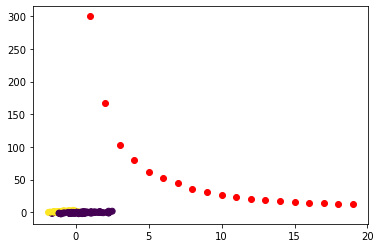

In [66]:
from sklearn.cluster import KMeans

k_inertia=[]
nIterations = range(1,20) 
for i in range(1,20):
    clf_kmeans = KMeans(n_clusters=i)
    cluster_kmeans = clf_kmeans.fit_predict(df_scaled)
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(nIterations,k_inertia,"ro") 
# с помощью "правила локтя" определяем "оптимальный" размер кластеров равным 2    

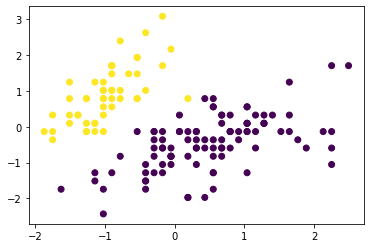

In [73]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_df)
plt.scatter(x=df_scaled[:,0],y=df_scaled[:,1],c=clusters)